In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
#load the dataset
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


## **Visualization**

Univariate

Text(0.5, 1.0, 'HISTOGRAM FOR AREA')

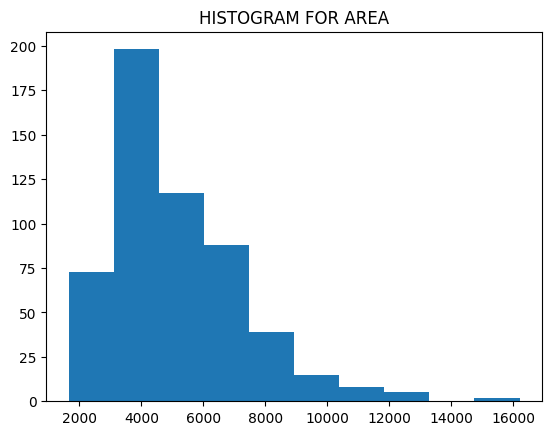

In [ ]:
#histogram
import matplotlib.pyplot as plt
plt.hist(data['area'])
plt.title("HISTOGRAM FOR AREA")

Text(0.5, 1.0, 'BOX PLOT OF AREA')

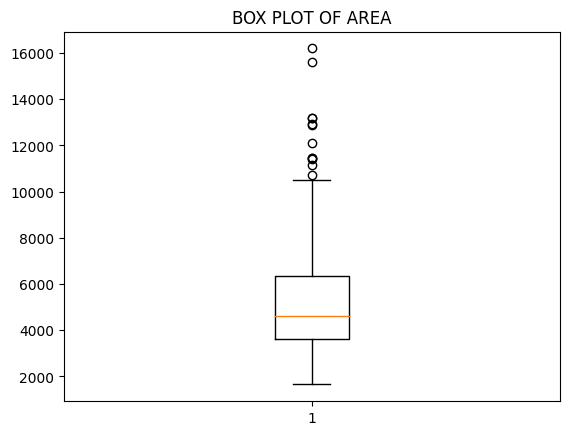

In [ ]:
#Box plot
plt.boxplot(data['area'])
plt.title("BOX PLOT OF AREA")

Bivariate

Text(0, 0.5, 'PRICE')

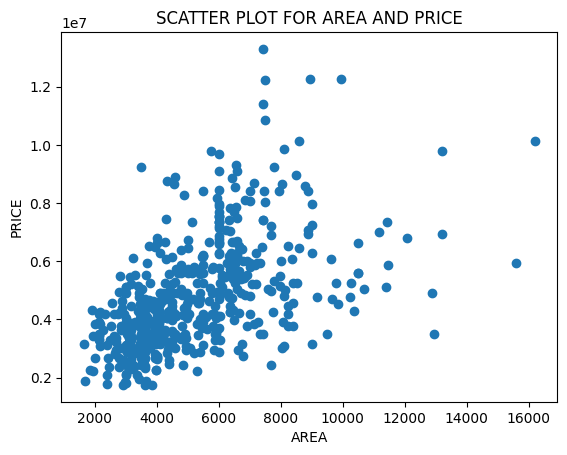

In [ ]:
#Scatter plot
plt.scatter(x=data['area'],y=data['price'])
plt.title("SCATTER PLOT FOR AREA AND PRICE")
plt.xlabel("AREA")
plt.ylabel("PRICE")

Text(0, 0.5, 'PRICE')

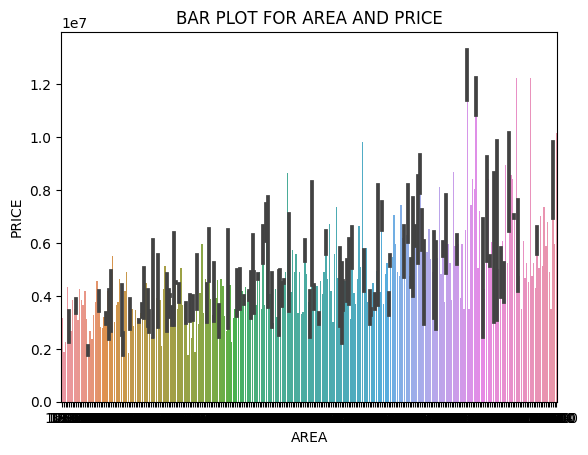

In [ ]:
#Bar plot
import seaborn as sns
sns.barplot(x=data['area'],y=data['price'])
plt.title("BAR PLOT FOR AREA AND PRICE")
plt.xlabel("AREA")
plt.ylabel("PRICE")

Multivariate

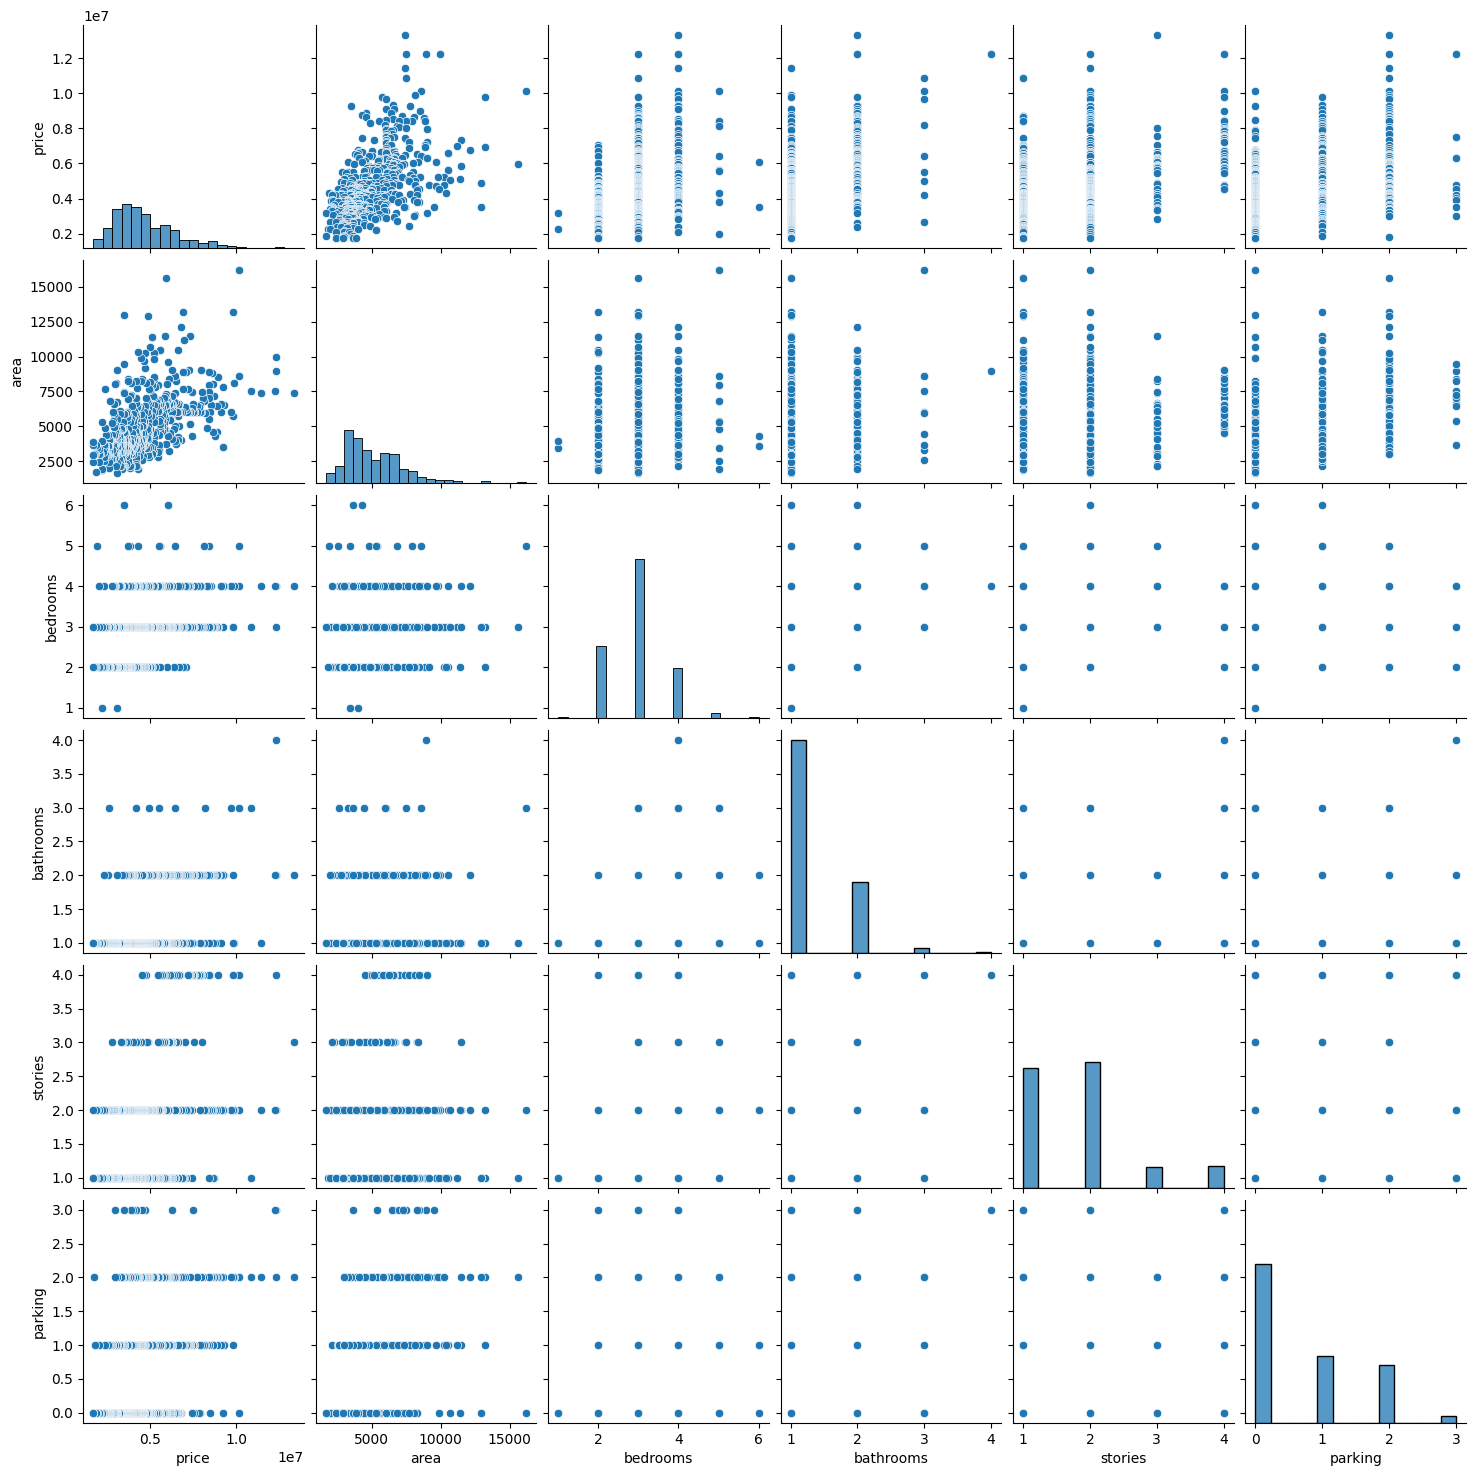

In [ ]:
#Pair plot
sns.pairplot(data)

<ipython-input-9-3ff71b0fd45c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


<Axes: >

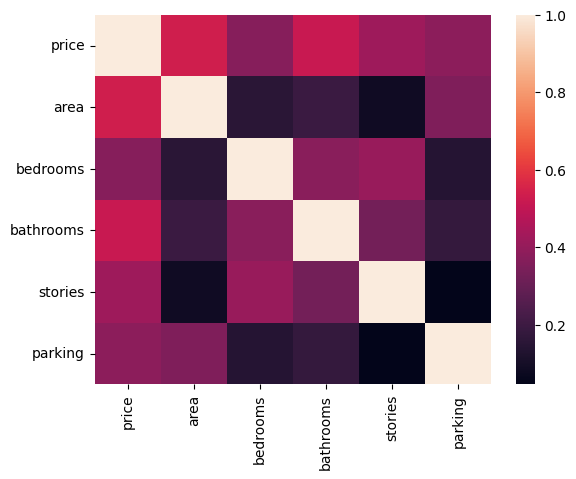

In [ ]:
#Heat map
cor=data.corr()
sns.heatmap(cor)

In [ ]:
# Descriptive statistics
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [ ]:
#data does not contain any null values in it
data.isnull().sum().any()

False

# **Outliers**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f85cddd4d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f85cddd5270>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f85cddd4a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f85cddd57b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f85cddd5a50>],
 'means': []}

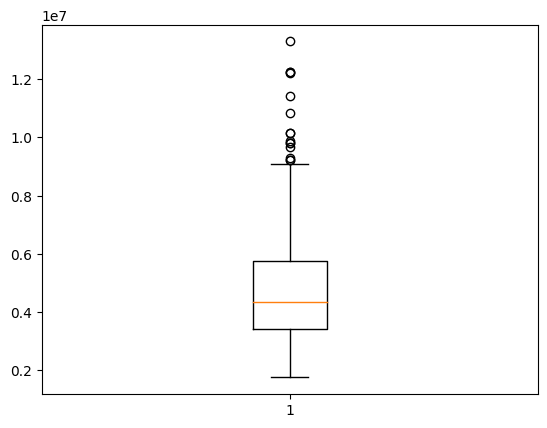

In [ ]:
#Outlier detection
plt.boxplot(data['price'])

In [ ]:
per=data['price'].quantile(0.99)
per

9540020.000000002

{'whiskers': [<matplotlib.lines.Line2D at 0x7f85d1390370>,
 'caps': [<matplotlib.lines.Line2D at 0x7f85d13923e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f85d1337310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f85d1392b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f85d13933d0>],
 'means': []}

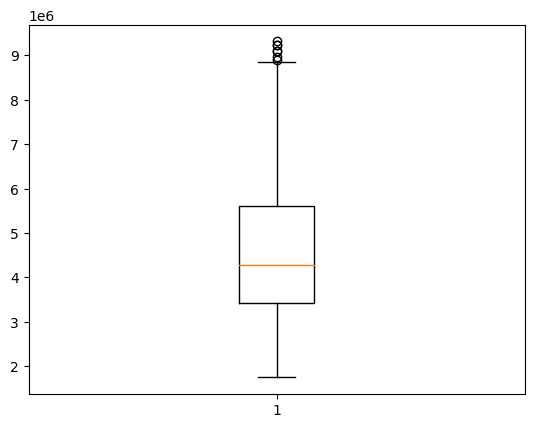

In [ ]:
data=data[data['price']<=per]
plt.boxplot(data['price'])

# **Encoding Techniques**

**One-hot encoding**

In [ ]:
# Perform one-hot encoding
data_main=pd.get_dummies(data,columns=['furnishingstatus'])
data_main

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,0,1,0
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,1,0,0
14,9240000,7800,3,2,2,yes,no,no,no,no,0,0,1,0
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,0,1,0
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,0,0,1
541,1767150,2400,3,1,1,no,no,no,no,no,0,0,1,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,0,0,1
543,1750000,2910,3,1,1,no,no,no,no,no,0,1,0,0


In [ ]:
data_main.corr()

<ipython-input-22-63ebd167fcb1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_main.corr()


,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.503585,0.339207,0.469607,0.426357,0.326080,0.213980,0.091763,-0.293640
area,0.503585,1.000000,0.111403,0.135983,0.064349,0.339157,0.135220,0.019970,-0.145682
bedrooms,0.339207,0.111403,1.000000,0.354980,0.404337,0.114717,0.065344,0.060982,-0.124243
bathrooms,0.469607,0.135983,0.354980,1.000000,0.307982,0.129434,0.116508,0.024551,-0.133227
stories,0.426357,0.064349,0.404337,0.307982,1.000000,0.019709,0.086473,0.003809,-0.083763
parking,0.326080,0.339157,0.114717,0.129434,0.019709,1.000000,0.106485,0.047264,-0.147804
furnishingstatus_furnished,0.213980,0.135220,0.065344,0.116508,0.086473,0.106485,1.000000,-0.491516,-0.406900
furnishingstatus_semi-furnished,0.091763,0.019970,0.060982,0.024551,0.003809,0.047264,-0.491516,1.000000,-0.595517
furnishingstatus_unfurnished,-0.293640,-0.145682,-0.124243,-0.133227,-0.083763,-0.147804,-0.406900,-0.595517,1.000000


<ipython-input-23-94001030d847>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_main.corr(),annot=True)


<Axes: >

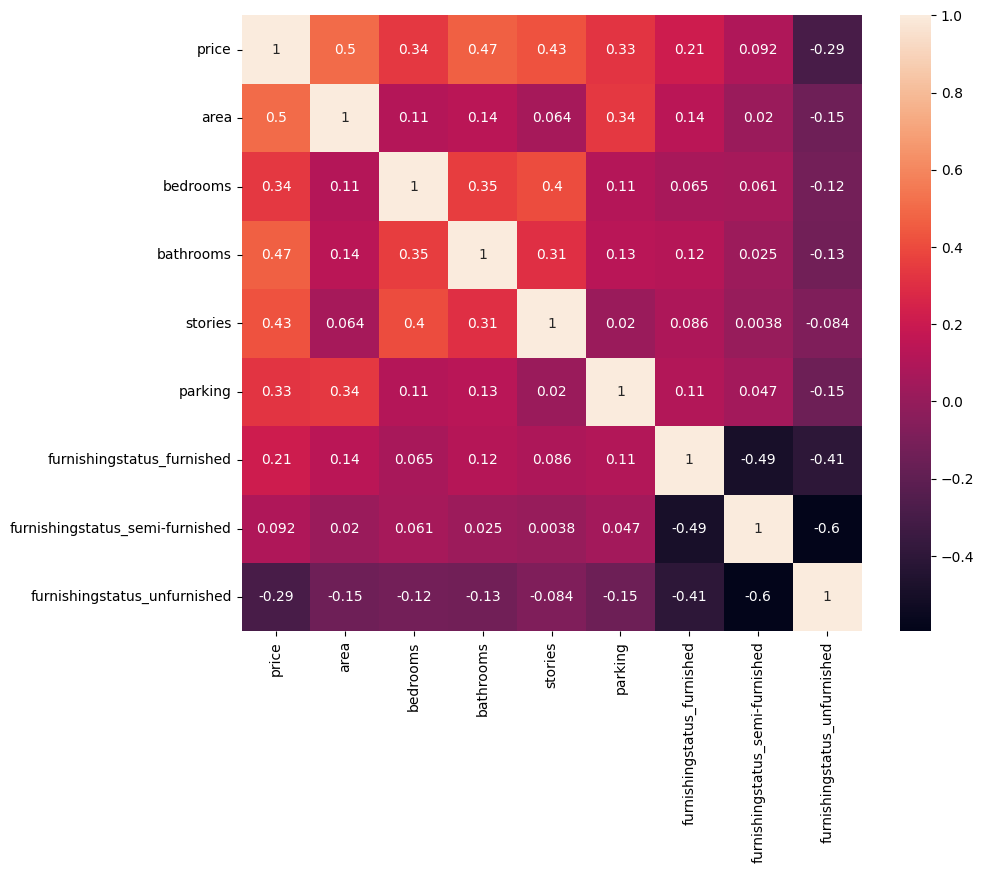

In [ ]:
#heat map
plt.figure(figsize=(10,8))
sns.heatmap(data_main.corr(),annot=True)

In [ ]:
data_main.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,0,1,0
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,1,0,0
14,9240000,7800,3,2,2,yes,no,no,no,no,0,0,1,0
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,0,1,0
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,0,0,1


**Label encoding**

In [ ]:
#Perform label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_main['basement']=le.fit_transform(data_main['basement'])
data_main.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
12,9310000,6550,4,2,2,yes,no,0,no,yes,1,0,1,0
13,9240000,3500,4,2,2,yes,no,0,yes,no,2,1,0,0
14,9240000,7800,3,2,2,yes,no,0,no,no,0,0,1,0
15,9100000,6000,4,1,2,yes,no,1,no,no,2,0,1,0
16,9100000,6600,4,2,2,yes,yes,1,no,yes,1,0,0,1


In [ ]:
data_main['guestroom']=le.fit_transform(data_main['guestroom'])
data_main.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
12,9310000,6550,4,2,2,yes,0,0,no,yes,1,0,1,0
13,9240000,3500,4,2,2,yes,0,0,yes,no,2,1,0,0
14,9240000,7800,3,2,2,yes,0,0,no,no,0,0,1,0
15,9100000,6000,4,1,2,yes,0,1,no,no,2,0,1,0
16,9100000,6600,4,2,2,yes,1,1,no,yes,1,0,0,1


In [ ]:
data_main['mainroad']=le.fit_transform(data_main['mainroad'])
data_main.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
12,9310000,6550,4,2,2,1,0,0,no,yes,1,0,1,0
13,9240000,3500,4,2,2,1,0,0,yes,no,2,1,0,0
14,9240000,7800,3,2,2,1,0,0,no,no,0,0,1,0
15,9100000,6000,4,1,2,1,0,1,no,no,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,no,yes,1,0,0,1


In [ ]:
data_main['airconditioning']=le.fit_transform(data_main['airconditioning'])
data_main['hotwaterheating']=le.fit_transform(data_main['hotwaterheating'])
data_main.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
12,9310000,6550,4,2,2,1,0,0,0,1,1,0,1,0
13,9240000,3500,4,2,2,1,0,0,1,0,2,1,0,0
14,9240000,7800,3,2,2,1,0,0,0,0,0,0,1,0
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,0,0,1


## **Split the data**

In [ ]:
# Split the data into dependent and independent variables
X = data_main.drop('price', axis=1) 
y = data_main['price']  


Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# LINEAR REGRESSION

In [ ]:
#build model
from sklearn.linear_model import LinearRegression

model = LinearRegression() 


In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


Measure metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1369924308820.9941
Mean Absolute Error (MAE): 881944.8080982586
R-squared (R2) Score: 0.5993432966323402


# DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()


In [ ]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2056448166565.4207
Mean Absolute Error (MAE): 1112898.598130841
R-squared (R2) Score: 0.3985581993419236


## Better model between the above two models

In [ ]:
from sklearn.metrics import r2_score

linear_regression_r2 = r2_score(y_test, model.predict(X_test))

decision_tree_r2 = r2_score(y_test, tree_model.predict(X_test))

print("R-squared (R2) Score - Linear Regression:", linear_regression_r2)
print("R-squared (R2) Score - Decision Tree Regressor:", decision_tree_r2)


R-squared (R2) Score - Linear Regression: 0.5993432966323402
R-squared (R2) Score - Decision Tree Regressor: 0.3985581993419236


## ***Higher R2 indicates better fit of the model. Therefore, linear regression is the best model.***